# 🏨 Análisis de Opiniones de Clientes - Cadena Hotelera en Andalucía


## 🎯 Objetivo

El propósito de este análisis es entender las ideas principales que los usuarios destacan en sus reseñas, identificar los aspectos más valorados (positiva o negativamente), y descubrir oportunidades de mejora a partir de los comentarios publicados en línea.

Aplicaremos técnicas de Procesamiento de Lenguaje Natural (NLP) para:

1. Limpieza y preprocesamiento de texto.
2. Identificación de vocabulario relevante usando TF-IDF.
3. Etiquetado gramatical con POS-tagging.
4. Visualización de dependencias gramaticales con spaCy.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
# Cargar dataset
df = pd.read_csv('/content/drive/MyDrive/2025-2/NLP/Big_AHR.csv',index_col='Unnamed: 0')

# Visualizar primeros registros
df.head()


,title,rating,review_text,location,hotel,label
0,Excelente y personal amable,5,Un hotel muy bueno. El personal fue muy amabl...,Seville_Province_of_Seville_Andalucia,H10_Casa_de_la_Plata,1
1,Céntrico,4,"Muy buen hotel al nivel de lo esperado, habita...",Seville_Province_of_Seville_Andalucia,H10_Casa_de_la_Plata,1
2,Hotel excepcional,5,Magnífico hotel. La verdad es que todo perfect...,Seville_Province_of_Seville_Andalucia,H10_Casa_de_la_Plata,1
3,WOW!!,5,"Hotel hermoso, buen diseño, original, limpio. ...",Seville_Province_of_Seville_Andalucia,H10_Casa_de_la_Plata,1
4,Magnifico,5,Magnífica ubicación en pleno centro de Sevilla...,Seville_Province_of_Seville_Andalucia,H10_Casa_de_la_Plata,1


## 🧹 Limpieza y Preprocesamiento del texto

In [ ]:
!python -m spacy download es_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 28.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import re
import spacy

In [ ]:
nlp = spacy.load("es_core_news_md")

In [ ]:
def clean_text(text: str) -> str:
    """
    Cleans and normalizes a Spanish text by removing punctuation, converting to lowercase,
    lemmatizing, and removing stopwords and punctuation using spaCy.

    Args:
        text (str): The input text to process.

    Returns:
        str: The cleaned and lemmatized text as a single string.
    """
    text = re.sub(r"[^\w\s]", "", str(text).lower(), flags=re.UNICODE)
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct])

In [ ]:
df = df.head(1000)

In [ ]:
df["clean_text"] = df["review_text"].apply(clean_text)
df["clean_text"].head()

,clean_text
0,hotel personal amable profesional gustar des...
1,hotel nivel esperado habitación junior suite d...
2,magnífico hotel perfecto habitación amplio act...
3,hotel hermoso diseño original limpio servicio ...
4,magnífico ubicación pleno centro sevilla recor...


In [ ]:
df["clean_text"][0]

'hotel   personal amable profesional gustar desayuno habitación cómodo limpio volvimos próximo seville seguro recomendar   ubicación cerca centro'

In [ ]:
df["review_text"][0]

'Un hotel muy bueno.  El personal fue muy amable y profesional. Nos gustaban desayuno mucho también. El habitación cómoda y limpia. Volvimos a próxima vez en Seville por seguro. Lo recomiendo !! Y también ubicación muy cerca del centro :))))'

## 🔍 Extracción de vocabulario característico (TF-IDF)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(max_features=30)
X = vectorizer.fit_transform(df["clean_text"])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

tfidf_df.head()

,agradable,amable,amplio,atención,atento,baño,cama,centro,cerca,cómodo,...,piscina,recepción,servicio,sevilla,tener,trato,ubicación,volver,zona,él
0,0.000000,0.351236,0.000000,0.0,0.0,0.0,0.000000,0.362243,0.398130,0.373425,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.342392,0.0,0.0,0.0
1,0.456261,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.430884,0.376141,0.0,0.0,0.0
2,0.000000,0.455795,0.520616,0.0,0.0,0.0,0.000000,0.000000,0.516649,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.503842,0.000000,0.0,0.000000,0.466081,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.448751,0.464666,0.000000,0.000000,...,0.0,0.0,0.000000,0.375965,0.0,0.000000,0.439202,0.0,0.0,0.0


## 🧠 Etiquetado gramatical (POS tagging) y extracción de temas

In [ ]:
def extract_nouns_adjs(text: str) -> list[tuple[str, str]]:
    """
    Extracts all nouns and adjectives from a given Spanish text using spaCy POS tagging.

    Args:
        text (str): The input text to analyze.

    Returns:
        list[tuple[str, str]]: A list of tuples where each tuple contains a word and its POS tag,
        limited to nouns ("NOUN") and adjectives ("ADJ").
    """
    doc = nlp(text)
    return [(token.text, token.pos_) for token in doc if token.pos_ in ["NOUN", "ADJ"]]

df["nouns_adjs"] = df["review_text"].apply(extract_nouns_adjs)
df[["review_text", "nouns_adjs"]].head()


,review_text,nouns_adjs
0,Un hotel muy bueno. El personal fue muy amabl...,"[(hotel, NOUN), (bueno, ADJ), (personal, NOUN)..."
1,"Muy buen hotel al nivel de lo esperado, habita...","[(buen, ADJ), (hotel, NOUN), (nivel, NOUN), (e..."
2,Magnífico hotel. La verdad es que todo perfect...,"[(Magnífico, ADJ), (hotel, NOUN), (verdad, NOU..."
3,"Hotel hermoso, buen diseño, original, limpio. ...","[(hermoso, ADJ), (buen, ADJ), (diseño, NOUN), ..."
4,Magnífica ubicación en pleno centro de Sevilla...,"[(Magnífica, ADJ), (ubicación, NOUN), (pleno, ..."


In [ ]:
df["nouns_adjs"][0]

[('hotel', 'NOUN'),
 ('bueno', 'ADJ'),
 ('personal', 'NOUN'),
 ('amable', 'ADJ'),
 ('profesional', 'ADJ'),
 ('desayuno', 'NOUN'),
 ('habitación', 'NOUN'),
 ('cómoda', 'ADJ'),
 ('limpia', 'ADJ'),
 ('próxima', 'ADJ'),
 ('vez', 'NOUN'),
 ('seguro', 'NOUN'),
 ('centro', 'NOUN')]

In [ ]:
def noun_adj_pairs(text: str) -> list[tuple[str, str]]:
    """
    Extract (noun, adjective) pairs from a Spanish text using spaCy POS tagging.

    A pair is formed when a NOUN and an ADJ are found within a 2-token window of each other.

    Args:
        text (str): The input text to analyze.

    Returns:
        list[tuple[str, str]]: List of (noun, adjective) tuples found in the text.
    """
    doc = nlp(text)
    nouns = [token for token in doc if token.pos_ == "NOUN"]
    adjs = [token for token in doc if token.pos_ == "ADJ"]
    return [(noun.text, adj.text) for noun in nouns for adj in adjs if abs(noun.i - adj.i) <= 2]


In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import spacy

In [ ]:
# Cargar modelo spaCy
nlp = spacy.load("es_core_news_md")

In [ ]:
df['clean_text']

,clean_text
0,hotel personal amable profesional gustar des...
1,hotel nivel esperado habitación junior suite d...
2,magnífico hotel perfecto habitación amplio act...
3,hotel hermoso diseño original limpio servicio ...
4,magnífico ubicación pleno centro sevilla recor...
...,...
995,hotel excelente ubicación sevilla agradable se...
996,3 hora viaje intentar hablar teléfono atender ...
997,estar puente diciembre llegar atención teléfon...
998,hospedamos 1 semana 17 27 diciembre 2019 apart...


In [ ]:
# Reseñas de ejemplo (puedes reemplazar por tus datos)
corpus = df.clean_text

# Acumuladores
all_nouns = []
all_adjs = []
all_pairs = []

for text in corpus:
    doc = nlp(text)
    all_nouns.extend([token.text for token in doc if token.pos_ == "NOUN"])
    all_adjs.extend([token.text for token in doc if token.pos_ == "ADJ"])
    all_pairs.extend(noun_adj_pairs(text))

In [ ]:
# Contar frecuencias
noun_freq = Counter(all_nouns)
adj_freq = Counter(all_adjs)
pair_freq = Counter(all_pairs)

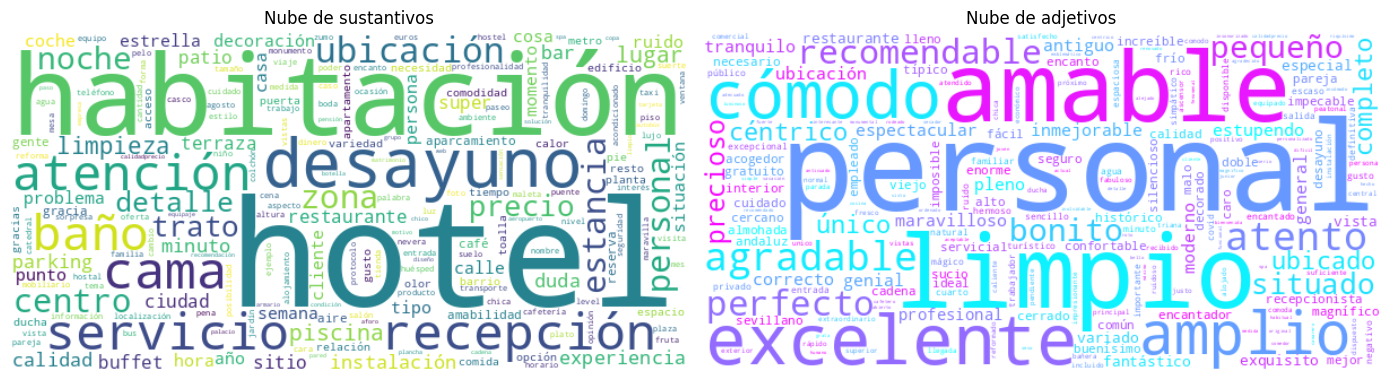

In [ ]:
# Nubes de palabras
wc_nouns = WordCloud(width=600, height=300, background_color="white").generate_from_frequencies(noun_freq)
wc_adjs = WordCloud(width=600, height=300, background_color="white", colormap="cool").generate_from_frequencies(adj_freq)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.imshow(wc_nouns, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de sustantivos")

plt.subplot(1, 2, 2)
plt.imshow(wc_adjs, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de adjetivos")

plt.tight_layout()
plt.show()

In [ ]:
# Top 10 pares más frecuentes
df_pairs = pd.DataFrame(pair_freq.most_common(10), columns=["(NOUN, ADJ)", "Frequency"])
display(df_pairs)

,"(NOUN, ADJ)",Frequency
0,"(habitación, amplio)",77
1,"(habitación, limpio)",70
2,"(hotel, personal)",66
3,"(cama, cómodo)",53
4,"(habitación, cómodo)",50
5,"(hotel, situado)",45
6,"(hotel, excelente)",43
7,"(recepción, personal)",42
8,"(trato, personal)",36
9,"(hotel, bonito)",36


## 👁️ Visualización de estructura gramatical

In [ ]:
from spacy import displacy

In [ ]:
# Visualizar dependencias de un ejemplo
example = df["review_text"].iloc[0]
doc = nlp(example)
displacy.render(doc, style="dep", jupyter=True)

## 📌 Conclusiones


A partir del análisis:
- Se identificaron temas frecuentes en las reseñas: habitación, personal, ubicación, desayuno, etc.
- Adjetivos como “excelente”, “amable”, “limpio” reflejan percepción positiva.
- Esta información puede alimentar un sistema de monitoreo de satisfacción o una herramienta de análisis de reputación.
